# Exploratory Analysis: Population-Normalized Flu Hospitalizations

Goal:
- Check whether population normalization makes flu hospitalizations comparable
  across states of different sizes.  
- Example comparison: Pennsylvania (PA) vs Connecticut (CT).

In [3]:
import os
print(os.getcwd())
print(os.path.exists("analysis_data/hosps_pop_norm.csv"))

C:\Users\Amandeep\Desktop\ResearchProject\data-driven-svd-regression\exploratory_analysis
False


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = os.path.join("..", "analysis_data", "hosps_pop_norm.csv")
VIZ_DIR = os.path.join("..", "viz")
os.makedirs(VIZ_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)
df["date"] = pd.to_datetime(df["date"])

df.head()


,date,location,location_name,population,value,season,season_week,epiyear,epiweek,weekly_rate,hosps_pop_norm
0,2020-10-24,01,Alabama,5108468,3.0,2020/2021,3,2020,43,0.058165,0.058726
1,2020-10-31,01,Alabama,5108468,18.0,2020/2021,4,2020,44,0.348993,0.352356
2,2020-11-07,01,Alabama,5108468,21.0,2020/2021,5,2020,45,0.407158,0.411082
3,2020-11-14,01,Alabama,5108468,25.0,2020/2021,6,2020,46,0.484712,0.489384
4,2020-11-21,01,Alabama,5108468,11.0,2020/2021,7,2020,47,0.213273,0.215329


In [9]:
# 3-week rolling mean (smooth weekly noise)
df = df.sort_values(["location", "date"]).copy()
df["hosps_pop_norm_smoothed"] = (
    df.groupby("location")["hosps_pop_norm"]
      .rolling(window=3, center=True)
      .mean()
      .reset_index(level=0, drop=True)
)

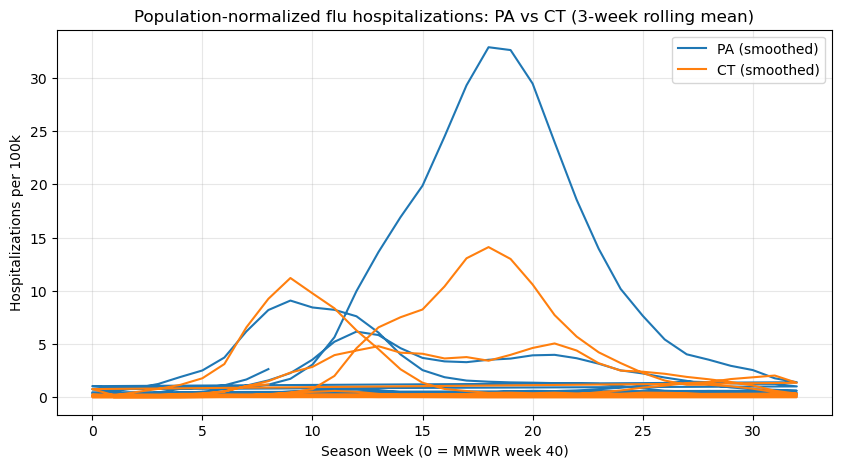

In [10]:
pa, ct = "42", "09"
sub = df[df["location"].isin([pa, ct])]

plt.figure(figsize=(10, 5))

plt.plot(sub[sub["location"] == pa]["season_week"],
         sub[sub["location"] == pa]["hosps_pop_norm_smoothed"],
         label="PA (smoothed)")

plt.plot(sub[sub["location"] == ct]["season_week"],
         sub[sub["location"] == ct]["hosps_pop_norm_smoothed"],
         label="CT (smoothed)")

plt.xlabel("Season Week (0 = MMWR week 40)")
plt.ylabel("Hospitalizations per 100k")
plt.title("Population-normalized flu hospitalizations: PA vs CT (3-week rolling mean)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


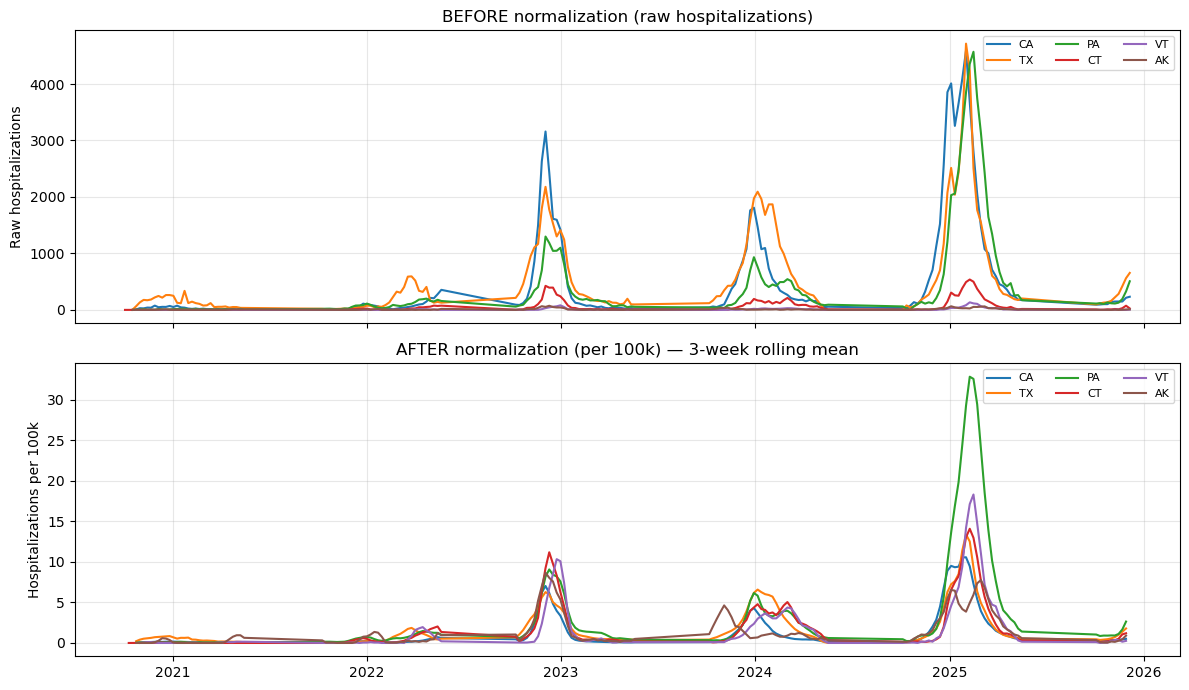

In [11]:
compare = {
    "06": "CA", "48": "TX", "42": "PA", "09": "CT", "50": "VT", "02": "AK",
}

multi = df[df["location"].isin(compare.keys())]

fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

# Raw counts (keep raw)
for code, label in compare.items():
    g = multi[multi["location"] == code]
    axes[0].plot(g["date"], g["value"], label=label)

axes[0].set_title("BEFORE normalization (raw hospitalizations)")
axes[0].set_ylabel("Raw hospitalizations")
axes[0].legend(ncol=3, fontsize=8)
axes[0].grid(alpha=0.3)

# Normalized (smoothed)
for code, label in compare.items():
    g = multi[multi["location"] == code]
    axes[1].plot(g["date"], g["hosps_pop_norm_smoothed"], label=label)

axes[1].set_title("AFTER normalization (per 100k) — 3-week rolling mean")
axes[1].set_ylabel("Hospitalizations per 100k")
axes[1].legend(ncol=3, fontsize=8)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
